In [1]:
import matplotlib.pyplot as plt
import torch
import timm
import torchvision
from hw2 import PROJECT_ROOT
from hw2.utils import validate_on_cifar
from hw2.data.cifar100_lt import CIFAR100LT, get_img_num_per_cls
from sklearn import metrics
from torch.utils.data import DataLoader

In [7]:
model = timm.create_model("timm/vit_mediumd_patch16_reg4_gap_384.sbb2_e200_in12k_ft_in1k")
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)
model.head = torch.nn.Linear(in_features=model.head.in_features, out_features=100)
model.load_state_dict(torch.load(PROJECT_ROOT / "models" / "cifar100lt" / "vit_0.7399_epochs8.5.pth"))

# model = torchvision.models.resnet18(num_classes=100)
# model.load_state_dict(torch.load(PROJECT_ROOT / "models" / "cifar100lt" / "resnet18_0.2002_warmup.pth"))
# transforms = CIFAR100LT.basic_test_transform

C:\Users\ACER\AppData\Local\Temp\ipykernel_27000\2894304262.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PROJECT_ROOT / "models" / "c

<All keys matched successfully>

In [3]:
import pdb
criterion = torch.nn.CrossEntropyLoss()

results = validate_on_cifar(model, criterion, transforms, device=torch.device("cuda"), cifar_dataset="CIFAR100LT")
results

Files already downloaded and verified


{'loss': 7.152597578265999, 'accuracy': 0.2002}

In [27]:
device = torch.device("cuda")
model.to(device).eval()

dataset = CIFAR100LT(root=PROJECT_ROOT / "data", train=False, download=True, transform=CIFAR100LT.basic_test_transform)
test_loader = DataLoader(
    dataset,
    batch_size=128,
    shuffle=False,
)

predictions = []
all_labels = []
for data in test_loader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    outputs: torch.Tensor = model(inputs)
    predicted = outputs.argmax(dim=1)
    predictions.append(predicted)
    all_labels.append(labels)

predictions = torch.cat(predictions).cpu()
all_labels = torch.cat(all_labels).cpu()

report = metrics.classification_report(all_labels, predictions, target_names=dataset.classes, digits=4)
print(report)

Files already downloaded and verified
               precision    recall  f1-score   support

        apple       0.32      0.71      0.44       100
aquarium_fish       0.21      0.51      0.29       100
         baby       0.15      0.23      0.18       100
         bear       0.08      0.17      0.11       100
       beaver       0.12      0.21      0.15       100
          bed       0.13      0.25      0.17       100
          bee       0.15      0.47      0.23       100
       beetle       0.13      0.46      0.21       100
      bicycle       0.12      0.31      0.18       100
       bottle       0.21      0.45      0.29       100
         bowl       0.08      0.11      0.09       100
          boy       0.15      0.22      0.18       100
       bridge       0.15      0.40      0.22       100
          bus       0.13      0.31      0.18       100
    butterfly       0.12      0.21      0.15       100
        camel       0.16      0.36      0.22       100
          can       0.16  

Files already downloaded and verified


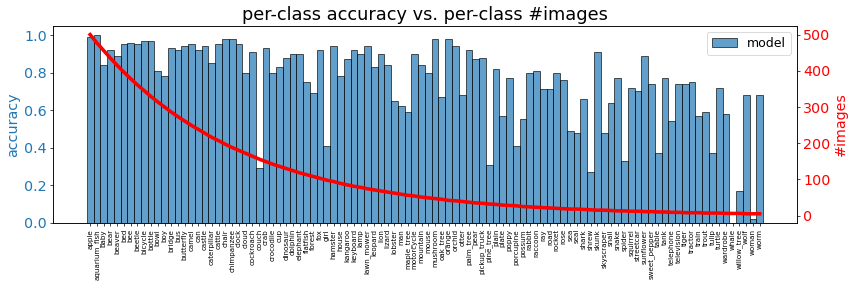

In [9]:
from hw2.visualization import plot_per_class_accuracy
from matplotlib import pyplot as plt

dataset = CIFAR100LT(root=PROJECT_ROOT / "data", train=False, download=True, transform=transforms)
test_loader = DataLoader(
    dataset,
    batch_size=128,
    shuffle=False,
)
model.to(torch.device("cuda")).eval()
plot_per_class_accuracy({"model": model}, dataloader=test_loader, labelnames=dataset.classes, img_num_per_cls=get_img_num_per_cls(100, "exp", 0.01, 500), device=torch.device("cuda"))
plt.savefig(PROJECT_ROOT / "artifacts" / "vit_per_class_accuracy.png")

In [10]:
plt.savefig(PROJECT_ROOT / "artifacts" / "vit_per_class_accuracy.svg")

<Figure size 640x480 with 0 Axes>